In [39]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer  

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [40]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

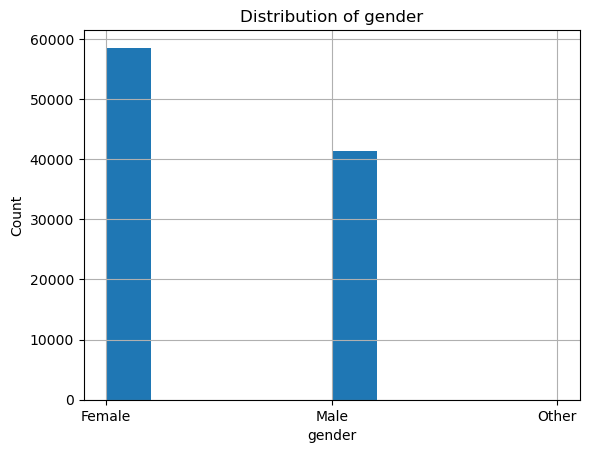

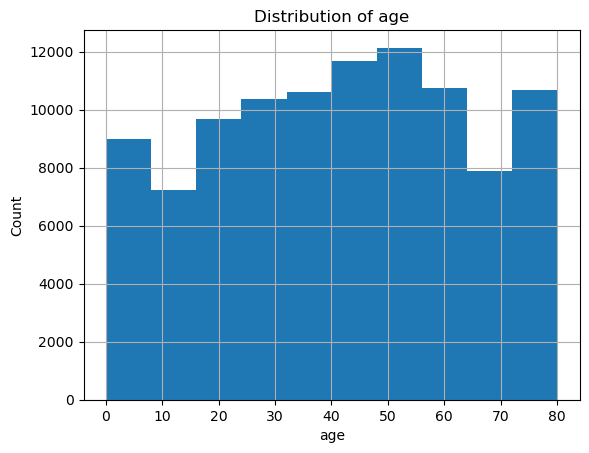

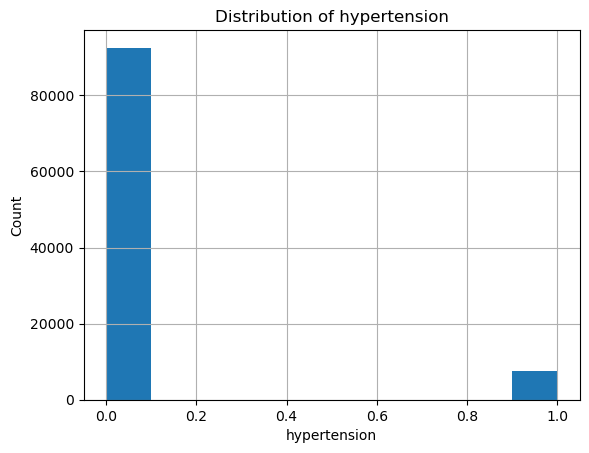

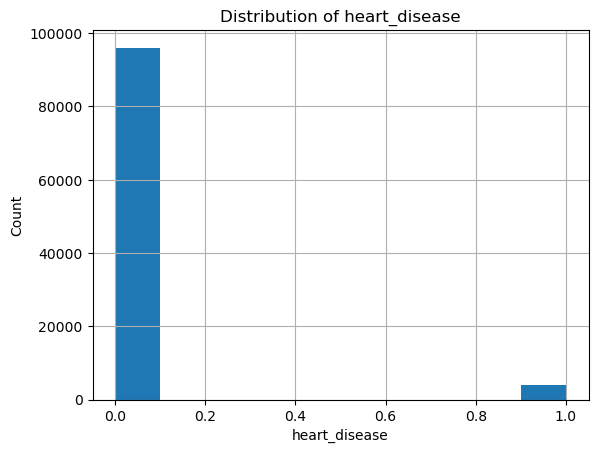

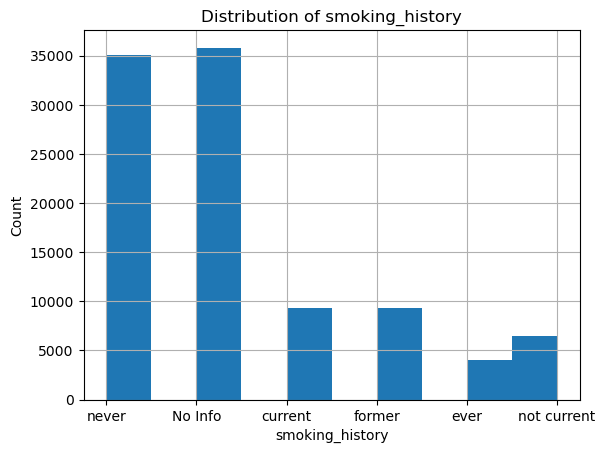

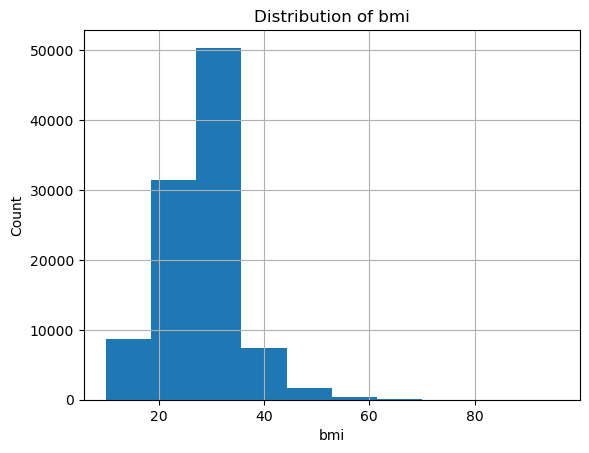

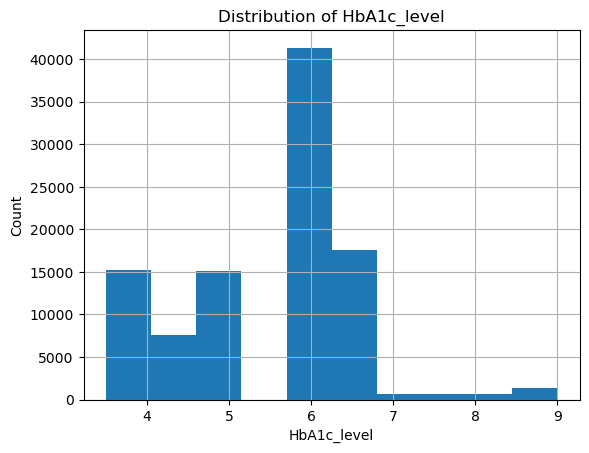

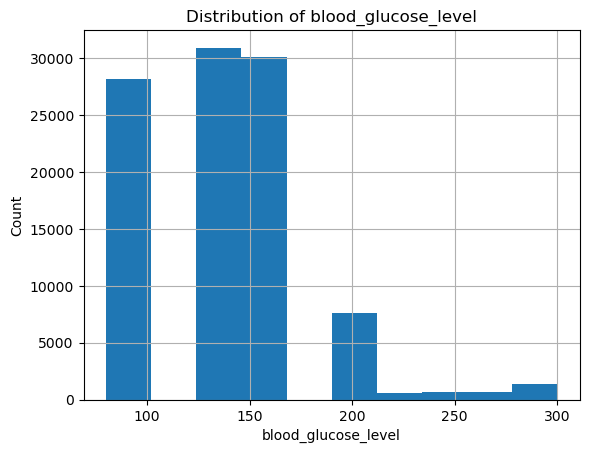

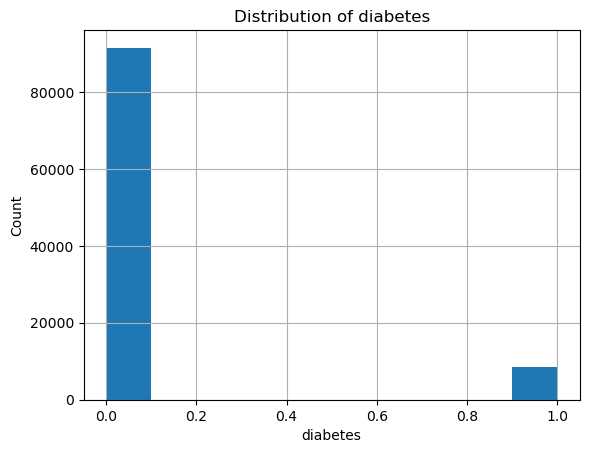

In [41]:
import matplotlib.pyplot as plt

for col in df:
    plt.figure()
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()

In [42]:
report = pd.DataFrame(columns=['Column', 'Count', 'Miss%', 'Cardinality',
                               'Mode', 'Mode Freq', 'Mode%', '2nd Mode', '2nd Mode Freq', '2nd Mode%'])

for col in df.columns:
    # Basic metrics
    count = df[col].count()
    miss_percent = (1 - count / len(df)) * 100
    cardinality = df[col].nunique()
    
    # Mode 
    mode_data = df[col].mode()
    mode = mode_data.iloc[0] if not mode_data.empty else None
    mode_freq = df[col].value_counts().iloc[0] if mode is not None else 0
    mode_percent = (mode_freq / count) * 100 if count > 0 else 0
    
    # Second mode 
    second_mode_data = df[col].value_counts().iloc[1:2]
    second_mode = second_mode_data.index[0] if not second_mode_data.empty else None
    second_mode_freq = second_mode_data.iloc[0] if not second_mode_data.empty else 0
    second_mode_percent = (second_mode_freq / count) * 100 if count > 0 else 0
    
    # Append to the report
    report = pd.concat([report, pd.DataFrame({'Column': [col],
                                              'Count': [count],
                                              'Miss%': [miss_percent],
                                              'Cardinality': [cardinality],
                                              'Mode': [mode],
                                              'Mode Freq': [mode_freq],
                                              'Mode%': [mode_percent],
                                              '2nd Mode': [second_mode],
                                              '2nd Mode Freq': [second_mode_freq],
                                              '2nd Mode%': [second_mode_percent]})], ignore_index=True)

# Display the report
print(report)

C:\Users\kedus\AppData\Local\Temp\ipykernel_44876\3293451596.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, pd.DataFrame({'Column': [col],


                Column   Count  Miss% Cardinality     Mode Mode Freq   Mode%  \
0               gender  100000    0.0           3   Female     58552  58.552   
1                  age  100000    0.0         102     80.0      5621   5.621   
2         hypertension  100000    0.0           2        0     92515  92.515   
3        heart_disease  100000    0.0           2        0     96058  96.058   
4      smoking_history  100000    0.0           6  No Info     35816  35.816   
5                  bmi  100000    0.0        4247    27.32     25495  25.495   
6          HbA1c_level  100000    0.0          18      6.6      8540   8.540   
7  blood_glucose_level  100000    0.0          18      130      7794   7.794   
8             diabetes  100000    0.0           2        0     91500  91.500   

  2nd Mode 2nd Mode Freq  2nd Mode%  
0     Male         41430     41.430  
1     51.0          1619      1.619  
2        1          7485      7.485  
3        1          3942      3.942  
4    neve

In [43]:
# ... (Your code to create the 'report' DataFrame) ...

# Save the report to a CSV file
report.to_csv('report.csv', index=False) 


In [44]:
new_df = df[['age', 'bmi','HbA1c_level','blood_glucose_level']] 

summary_report = pd.DataFrame()

summary_report['Count'] = new_df.count()
summary_report['Miss%'] = 100 * (1 - report['Count'] / len(new_df))
summary_report['Cardinality'] = new_df.nunique()
summary_report['Min'] = new_df.min()
summary_report['Q1'] = new_df.quantile(0.25)
summary_report['Mean'] = new_df.mean()
summary_report['Median'] =new_df.median()
summary_report['Q3'] = new_df.quantile(0.75)
summary_report['Max'] = new_df.max()
summary_report['Std Dev'] = new_df.std()

# Display the report
print(summary_report)

                      Count Miss%  Cardinality    Min      Q1        Mean  \
age                  100000   NaN          102   0.08   24.00   41.885856   
bmi                  100000   NaN         4247  10.01   23.63   27.320767   
HbA1c_level          100000   NaN           18   3.50    4.80    5.527507   
blood_glucose_level  100000   NaN           18  80.00  100.00  138.058060   

                     Median      Q3     Max    Std Dev  
age                   43.00   60.00   80.00  22.516840  
bmi                   27.32   29.58   95.69   6.636783  
HbA1c_level            5.80    6.20    9.00   1.070672  
blood_glucose_level  140.00  159.00  300.00  40.708136  


In [45]:
summary_report.to_csv('report2.csv', index=False) 

In [46]:
def calculate_entropy(column):
    """Calculates entropy of a single column"""
    counts = np.bincount(column)
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))  
    return entropy

In [47]:
categorical_cols = df.columns[df.nunique() <= 10].tolist()  # Ensure this is a list
numerical_cols = df.columns[df.nunique() > 10].tolist()
target_col = 'diabetes'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
# Impute missing values for numerical data
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

In [48]:
# Impute missing values for categorical data
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
# Scale numerical columns using Z-score normalization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [53]:

# One-hot encode categorical columns, using drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[categorical_cols])
# Check the scikit-learn version and use the appropriate method to get feature names
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
encoded_cols_df = pd.DataFrame(encoded_cols.toarray(), columns=encoded_col_names)
df = df.drop(categorical_cols, axis=1)  # Drop original categorical columns
df = pd.concat([df, encoded_cols_df], axis=1)# Add encoded columns

KeyError: "None of [Index(['gender', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object')] are in the [columns]"

In [54]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)